# Correlação

Imports

In [653]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Leitura do arquivo em csv e carregamento desses dados em um DataFrame usando o ponto e vírgula como separador.

In [654]:
dados = pd.read_csv('dataframe-bsi-2009-2022.csv', sep=';')

## Tratamento de Dados

Substituindo vírgulas por pontos nas colunas que contêm valores decimais

In [655]:
colunas_decimais = ['media_final']
for coluna in colunas_decimais:
    dados[coluna] = dados[coluna].str.replace(',', '.')

Convertendo a coluna media_final para tipo numérico

In [656]:
dados[colunas_decimais] = dados[colunas_decimais].astype(float)

Renomeando dados da coluna descrição.

In [657]:
dados = dados.replace({'descricao':
               {'APROVADO POR NOTA':'APROVADO',
                'REPROVADO POR FALTAS':'REPROVADO',
                'REPROVADO POR MÉDIA E POR FALTAS':'REPROVADO',
                'REPROVADO POR NOTA E FALTA':'REPROVADO',
                'REPROVADO POR NOTA':'REPROVADO',

                }}, regex=True)

Filtrando os dados da unidade 1.

In [658]:
filtro  = dados['unidade'] == 1
df_dados_filtrado = dados[filtro]
df_dados_filtrado

,discente,unidade,media_final,descricao,ano,id_componente,nome,sexo,ano_nascimento,ano_ingresso,status
0,afba64c0118bfcc8d5b3987e725ed545,1.0,1.5,REPROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1987,2009,CANCELADO
3,9526e01da587b20211a39b4e66673aea,1.0,9.2,APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1990,2009,CONCLUÍDO
6,1ed6777bd6ff4fd393e0b334d519c642,1.0,8.0,APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1991,2009,CONCLUÍDO
9,cd66757ed4a317a3537ae3e246648778,1.0,7.3,APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1975,2009,CANCELADO
12,fa7b20f8ac2312976cd7338487ad527d,1.0,9.8,APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1978,2009,CONCLUÍDO
...,...,...,...,...,...,...,...,...,...,...,...
53189,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,9.3,APROVADO,20222,62766,SISTEMAS DE APOIO À DECISÃO,M,2000,2019,CONCLUÍDO
53190,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,9.8,APROVADO,20222,62764,PROGRAMAÇÃO VISUAL,M,2000,2019,CONCLUÍDO
53193,22f4aed4a073c5e9515a8669e9c102f3,1.0,5.2,APROVADO,20222,62764,PROGRAMAÇÃO VISUAL,M,1984,2019,ATIVO - FORMANDO
53196,e10089f6080d3afa8904437086ea2752,1.0,9.3,APROVADO,20222,2050107,DIREITO E LEGISLAÇÃO SOCIAL,M,2002,2019,ATIVO


Lista dos componentes curriculares obrigatórios.

In [659]:
lista_obrigatórias = [
                'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO',
                'INTRODUÇÃO À INFORMÁTICA',
                'FUNDAMENTOS DE MATEMÁTICA',
                'LÓGICA',
                'TEORIA GERAL DA ADMINISTRAÇÃO',
                'PROGRAMAÇÃO',
                'CÁLCULO DIFERENCIAL E INTEGRAL',
                'TEORIA GERAL DOS SISTEMAS',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS I',
                'ESTRUTURA DE DADOS',
                'ÁLGEBRA LINEAR',
                'ORGANIZAÇÃO, SISTEMAS E MÉTODOS',
                'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO',
                'PROGRAMAÇÃO WEB',
                'ARQUITETURA DE COMPUTADORES',
                'PROBABILIDADE E ESTATÍSTICA',
                'BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE I',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS II',
                'SISTEMAS OPERACIONAIS',
                'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE II',
                'REDES DE COMPUTADORES',
                'CONTABILIDADE E CUSTOS',
                'EMPREENDEDORISMO EM INFORMÁTICA',
                'GESTÃO DE PROJETO DE SOFTWARE',
                'PROGRAMAÇÃO VISUAL',
                'MATEMÁTICA FINANCEIRA',
                'SISTEMAS DE APOIO À DECISÃO',
                'ÉTICA',
                ]
condição_nome = f"nome in {lista_obrigatórias}"
df_dados_filtrado = df_dados_filtrado.query(condição_nome)

Filtrando os dados com a descrição APROVADO e REPROVADO.

In [660]:
filtro = (df_dados_filtrado['descricao'] == 'APROVADO') | (df_dados_filtrado['descricao'] == 'REPROVADO')
df_dados_filtrado = df_dados_filtrado[filtro]

### **Primeiro Período**

```
	ALGORITMOS E LÓGICA DE PROGRAMAÇÃO 90h
	INTRODUÇÃO À INFORMÁTICA 60h
	FUNDAMENTOS DE MATEMÁTICA 60h
	LÓGICA 60h
	TEORIA GERAL DA ADMINISTRAÇÃO 60h
```

#### ALGORITMOS E LÓGICA DE PROGRAMAÇÃO

In [661]:
algoritmo = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037000) |
                                               (df_dados_filtrado['id_componente'] == 62486) &
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
algoritmo = algoritmo[['discente', 'media_final']]
algoritmo

,discente,media_final
0,afba64c0118bfcc8d5b3987e725ed545,1.5
3,9526e01da587b20211a39b4e66673aea,9.2
6,1ed6777bd6ff4fd393e0b334d519c642,8.0
9,cd66757ed4a317a3537ae3e246648778,7.3
12,fa7b20f8ac2312976cd7338487ad527d,9.8
...,...,...
49091,9d98034372a5935696886fe82501810f,6.6
49094,7e10326d0da4e63e11261631332319db,6.1
49097,a22526ca2e7fd8a93af40d141489504e,9.0
49101,331893fdbda9db865e56e3a4f194d7da,7.2


In [662]:
algoritmo = algoritmo.groupby('discente').mean().reset_index()
algoritmo

,discente,media_final
0,005c14d7c07bf7980b60c703f99c5ee7,5.90
1,0107fd69d8cd7e3d30dede96fb68bfe5,5.60
2,014789363f7940922e71e710ee9d22bc,6.00
3,0168075add041f9eb4bba46d6fdb6387,2.00
4,020d362ad9aecb1942935475f1dc5f10,3.90
...,...,...
578,fe508adc657a48bc4cbfeed0856f5d93,1.80
579,fe802d8d85de6f842749468401d1146c,2.00
580,fec9ed6026d55ecdf514c640312c3d08,8.70
581,ff56f2c5048dae0797fd3e851572b80c,4.45


#### INTRODUÇÃO À INFORMÁTICA

In [663]:
intro_informatica = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037001) |
                                               (df_dados_filtrado['id_componente'] == 62487)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
intro_informatica = intro_informatica[['discente', 'media_final']]
intro_informatica

,discente,media_final
156,afba64c0118bfcc8d5b3987e725ed545,8.4
159,9526e01da587b20211a39b4e66673aea,8.3
162,1ed6777bd6ff4fd393e0b334d519c642,8.5
165,cd66757ed4a317a3537ae3e246648778,9.1
168,b3e68a0e40c1080434a52ea27b8abdcc,9.6
...,...,...
49249,331893fdbda9db865e56e3a4f194d7da,5.2
49252,a02a255eadcaa6d79c6618c327193f9c,5.6
49256,0a078f407dbf55307a5d5916338b18c6,9.7
49258,9adbed3b0dea95e5a7eb14af393401e8,6.0


In [664]:
intro_informatica = intro_informatica.groupby('discente').mean().reset_index()
intro_informatica 

,discente,media_final
0,005c14d7c07bf7980b60c703f99c5ee7,2.55
1,0107fd69d8cd7e3d30dede96fb68bfe5,2.70
2,014789363f7940922e71e710ee9d22bc,3.00
3,0168075add041f9eb4bba46d6fdb6387,0.00
4,020d362ad9aecb1942935475f1dc5f10,7.20
...,...,...
564,fe508adc657a48bc4cbfeed0856f5d93,1.80
565,fe802d8d85de6f842749468401d1146c,0.00
566,fec9ed6026d55ecdf514c640312c3d08,8.60
567,ff56f2c5048dae0797fd3e851572b80c,3.80


#### FUNDAMENTOS DE MATEMÁTICA

In [665]:
fundamentos_mat = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037003) |
                                               (df_dados_filtrado['id_componente'] == 62488)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
fundamentos_mat = fundamentos_mat[['discente', 'media_final']]
fundamentos_mat.head()

,discente,media_final
300,afba64c0118bfcc8d5b3987e725ed545,5.0
303,9526e01da587b20211a39b4e66673aea,9.0
306,1ed6777bd6ff4fd393e0b334d519c642,7.5
309,fa7b20f8ac2312976cd7338487ad527d,9.6
312,4a7ffdef8dd0b4a8c2ce87e6dcd439ad,5.0


In [666]:
fundamentos_mat = fundamentos_mat.groupby('discente').mean().reset_index()

#### LÓGICA

In [667]:
logica = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037002) |
                                               (df_dados_filtrado['id_componente'] == 62489)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
logica = logica[['discente', 'media_final']]
logica.head()

,discente,media_final
436,afba64c0118bfcc8d5b3987e725ed545,2.2
439,9526e01da587b20211a39b4e66673aea,7.6
442,1ed6777bd6ff4fd393e0b334d519c642,7.6
445,cd66757ed4a317a3537ae3e246648778,8.4
448,fa7b20f8ac2312976cd7338487ad527d,9.4


In [668]:
logica = logica.groupby('discente').mean().reset_index()

#### TEORIA GERAL DA ADMINISTRAÇÃO

In [669]:
tga = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037004) |
                                               (df_dados_filtrado['id_componente'] == 62490)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
tga = tga[['discente', 'media_final']]
tga.head()

,discente,media_final
589,afba64c0118bfcc8d5b3987e725ed545,5.0
592,9526e01da587b20211a39b4e66673aea,7.7
595,1ed6777bd6ff4fd393e0b334d519c642,7.5
598,cd66757ed4a317a3537ae3e246648778,8.3
601,fa7b20f8ac2312976cd7338487ad527d,9.7


In [670]:
tga = tga.groupby('discente').mean().reset_index()

### **Segundo Período**

```
PROGRAMAÇÃO - 90h
CÁLCULO DIFERENCIAL E INTEGRAL - 60h
TEORIA GERAL DOS SISTEMAS - 60h
```

#### PROGRAMAÇÃO

In [671]:
programacao = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037006) |
                                               (df_dados_filtrado['id_componente'] == 62748)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
programacao = programacao[['discente', 'media_final']]
programacao.head()

,discente,media_final
1017,9526e01da587b20211a39b4e66673aea,10.0
1020,1ed6777bd6ff4fd393e0b334d519c642,10.0
1024,b3e68a0e40c1080434a52ea27b8abdcc,8.3
1027,7e43b627fcb2a24d90aee995e59fe683,10.0
1030,09f8afb587de0f57f7fdf5b42a4890d9,7.5


In [672]:
programacao = programacao.groupby('discente').mean().reset_index()

#### CÁLCULO DIFERENCIAL E INTEGRAL

In [673]:
calculo = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037007) |
                                               (df_dados_filtrado['id_componente'] == 62708)&
                                             (df_dados_filtrado['ano'] < 20222)]

#Separando atributos
calculo = calculo[['discente', 'media_final']]
calculo.head()

,discente,media_final
1323,9526e01da587b20211a39b4e66673aea,6.9
1326,1ed6777bd6ff4fd393e0b334d519c642,6.0
1329,fa7b20f8ac2312976cd7338487ad527d,9.4
1332,02dad20dec819bcc384cc6fa0b7ecbf9,5.0
1335,4a7ffdef8dd0b4a8c2ce87e6dcd439ad,5.2


In [674]:
calculo = calculo.groupby('discente').mean().reset_index()

#### TEORIA GERAL DOS SISTEMAS

In [675]:
tgs = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 62707) |
                                               (df_dados_filtrado['id_componente'] == 2037008)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
tgs = tgs[['discente', 'media_final']]
tgs.head()

,discente,media_final
1174,afba64c0118bfcc8d5b3987e725ed545,6.5
1177,9526e01da587b20211a39b4e66673aea,8.8
1180,1ed6777bd6ff4fd393e0b334d519c642,8.4
1183,cd66757ed4a317a3537ae3e246648778,8.2
1187,fa7b20f8ac2312976cd7338487ad527d,9.1


In [676]:
tgs = tgs.groupby('discente').mean().reset_index()

### **Terceiro Período**


```
PROGRAMAÇÃO ORIENTADA A OBJETOS I - 60h
FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO - 60h
ÁLGEBRA LINEAR - 60h
ORGANIZAÇÃO, SISTEMAS E MÉTODOS - 60h
ESTRUTURA DE DADOS - 90h
```

#### PROGRAMAÇÃO ORIENTADA A OBJETOS I

In [677]:
poo_1 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037012) |
                                               (df_dados_filtrado['id_componente'] == 62750)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
poo_1 = poo_1[['discente', 'media_final']]
poo_1.head()

,discente,media_final
1744,e6f3c15ce99a088df63a9f10579b6403,1.2
1751,f2b6381fd487de7c7cebaaaf595b3955,6.3
1757,d76837f252e65e726918a7fd7c75ff14,0.8
1758,6c87dae0bbd90f462ae3e3c3b2576c35,1.4
1762,e72622b6792cb37da347566bacb9edbc,0.3


In [678]:
poo_1 = poo_1.groupby('discente').mean().reset_index()

#### FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO

In [679]:
fundamentos_si = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037011) |
                                               (df_dados_filtrado['id_componente'] == 62709)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
fundamentos_si = fundamentos_si[['discente', 'media_final']]
fundamentos_si.head()

,discente,media_final
1875,cd66757ed4a317a3537ae3e246648778,8.9
1878,e6f3c15ce99a088df63a9f10579b6403,7.1
1881,8436d99e1e39d9a2c6ed60b45c52ae0d,7.2
1888,d76837f252e65e726918a7fd7c75ff14,6.9
1891,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,7.4


In [680]:
fundamentos_si = fundamentos_si.groupby('discente').mean().reset_index()

#### ÁLGEBRA LINEAR

In [681]:
algebra = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037016) |
                                               (df_dados_filtrado['id_componente'] == 62710)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
algebra = algebra[['discente', 'media_final']]
algebra.head()

,discente,media_final
2280,e6f3c15ce99a088df63a9f10579b6403,6.5
2284,8436d99e1e39d9a2c6ed60b45c52ae0d,6.1
2287,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,5.4
2293,6c87dae0bbd90f462ae3e3c3b2576c35,7.2
2296,d76837f252e65e726918a7fd7c75ff14,5.0


In [682]:
algebra = algebra.groupby('discente').mean().reset_index()

#### ORGANIZAÇÃO, SISTEMAS E MÉTODOS

In [683]:
osm = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 62751) |
                                               (df_dados_filtrado['id_componente'] == 2037013)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
osm = osm[['discente', 'media_final']]
osm.head()

,discente,media_final
2554,afba64c0118bfcc8d5b3987e725ed545,1.8
2559,e6f3c15ce99a088df63a9f10579b6403,3.9
2565,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,1.9
2568,f2b6381fd487de7c7cebaaaf595b3955,8.0
2571,6c87dae0bbd90f462ae3e3c3b2576c35,5.0


In [684]:
osm = osm.groupby('discente').mean().reset_index()

#### ESTRUTURA DE DADOS

In [685]:
ed = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2054351) |
                                               (df_dados_filtrado['id_componente'] == 62749)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
ed = ed[['discente', 'media_final']]
ed.head()

,discente,media_final
2687,f2b6381fd487de7c7cebaaaf595b3955,5.8
2690,d76837f252e65e726918a7fd7c75ff14,2.3
2693,8436d99e1e39d9a2c6ed60b45c52ae0d,1.6
2697,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,1.9
2699,e6f3c15ce99a088df63a9f10579b6403,2.4


In [686]:
ed = ed.groupby('discente').mean().reset_index()

### **Quarto Período**


```
ARQUITETURA DE COMPUTADORES - 60h
PROGRAMAÇÃO WEB - 60h
PROBABILIDADE E ESTATÍSTICA - 60h
BANCO DE DADOS - 60h
ENGENHARIA DE SOFTWARE I - 60h
```

#### ARQUITETURA DE COMPUTADORES

In [687]:
arquitetura = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037018) |
                                               (df_dados_filtrado['id_componente'] == 62711)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
arquitetura = arquitetura[['discente', 'media_final']]
arquitetura.head()

,discente,media_final
3790,8436d99e1e39d9a2c6ed60b45c52ae0d,1.9
3804,9b7909374b05a7b2c9d3df9ba88294db,1.4
3807,f76a98b78765318ba3c2942db7649750,3.0
3811,865acdb96823643020382e53511234b0,5.4
3814,7e43b627fcb2a24d90aee995e59fe683,9.1


In [688]:
arquitetura = arquitetura.groupby('discente').mean().reset_index()

#### PROGRAMAÇÃO WEB

In [689]:
p_web = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037021) |
                                               (df_dados_filtrado['id_componente'] == 62752)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
p_web = p_web[['discente', 'media_final']]
p_web.head()

,discente,media_final
5790,a624ee44a3c11e410590e9c6082d3ad3,7.2
5794,0ef299cf7ff58409e7e7b0ec75a33b31,7.3
5797,d1cc1d8d9326efc619dcd34db13bd13f,5.3
5800,7e43b627fcb2a24d90aee995e59fe683,9.0
5803,4641154186598ae01d4d0af879ea5003,6.2


In [690]:
p_web = p_web.groupby('discente').mean().reset_index()

#### PROBABILIDADE E ESTATÍSTICA

In [691]:
probabilidade = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037009) |
                                               (df_dados_filtrado['id_componente'] == 62712)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
probabilidade = probabilidade[['discente', 'media_final']]
probabilidade.head()

,discente,media_final
3554,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,6.0
3557,8436d99e1e39d9a2c6ed60b45c52ae0d,7.3
3560,e6f3c15ce99a088df63a9f10579b6403,6.0
3566,ba5a4542a911da465e9233fafaa290da,9.2
3575,865acdb96823643020382e53511234b0,7.3


In [692]:
probabilidade = probabilidade.groupby('discente').mean().reset_index()

#### BANCO DE DADOS

In [693]:
bd_1 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037014) |
                                               (df_dados_filtrado['id_componente'] == 62759)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
bd_1 = bd_1[['discente', 'media_final']]
bd_1.head()

,discente,media_final
3212,865acdb96823643020382e53511234b0,5.1
3217,afba64c0118bfcc8d5b3987e725ed545,2.2
3218,7e43b627fcb2a24d90aee995e59fe683,8.7
3221,4641154186598ae01d4d0af879ea5003,8.7
3226,0ef299cf7ff58409e7e7b0ec75a33b31,6.0


In [694]:
bd_1 = bd_1.groupby('discente').mean().reset_index()

#### ENGENHARIA DE SOFTWARE I

In [695]:
engenharia_1 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037017) |
                                               (df_dados_filtrado['id_componente'] == 62761)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
engenharia_1 = engenharia_1[['discente', 'media_final']]
engenharia_1.head()

,discente,media_final
3324,8436d99e1e39d9a2c6ed60b45c52ae0d,3.7
3328,0a88c7d4fa5cdcae0b5aa66e3cc0d0df,5.0
3331,e6f3c15ce99a088df63a9f10579b6403,5.2
3339,9b7909374b05a7b2c9d3df9ba88294db,5.7
3342,afba64c0118bfcc8d5b3987e725ed545,4.0


In [696]:
engenharia_1 = engenharia_1.groupby('discente').mean().reset_index()

### **Quinto Período**

```
PROGRAMAÇÃO ORIENTADA A OBJETOS II - 60h
SISTEMAS OPERACIONAIS - 60h
PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS - 60h
ENGENHARIA DE SOFTWARE II - 60h
```

#### PROGRAMAÇÃO ORIENTADA A OBJETOS II

In [697]:
poo_2 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037015) |
                                               (df_dados_filtrado['id_componente'] == 62758)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
poo_2 = poo_2[['discente', 'media_final']]
poo_2.head()

,discente,media_final
3281,865acdb96823643020382e53511234b0,6.6
3282,7e43b627fcb2a24d90aee995e59fe683,9.3
3285,4641154186598ae01d4d0af879ea5003,8.9
3288,0ef299cf7ff58409e7e7b0ec75a33b31,6.1
3291,d1cc1d8d9326efc619dcd34db13bd13f,5.9


In [698]:
poo_2 = poo_2.groupby('discente').mean().reset_index()

#### SISTEMAS OPERACIONAIS

In [699]:
so = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037022) |
                                               (df_dados_filtrado['id_componente'] == 62762)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
so = so[['discente', 'media_final']]
so.head()

,discente,media_final
5857,8436d99e1e39d9a2c6ed60b45c52ae0d,0.2
5863,6c87dae0bbd90f462ae3e3c3b2576c35,4.6
5870,a624ee44a3c11e410590e9c6082d3ad3,7.7
5876,f76a98b78765318ba3c2942db7649750,7.0
5879,0ef299cf7ff58409e7e7b0ec75a33b31,7.5


In [700]:
so = so.groupby('discente').mean().reset_index()

#### PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS

In [701]:
bd_2 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037019) |
                                               (df_dados_filtrado['id_componente'] == 62765)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
bd_2 = bd_2[['discente', 'media_final']]
bd_2.head()

,discente,media_final
5961,a624ee44a3c11e410590e9c6082d3ad3,7.4
5964,d1cc1d8d9326efc619dcd34db13bd13f,7.7
5967,7e43b627fcb2a24d90aee995e59fe683,8.5
5970,4641154186598ae01d4d0af879ea5003,8.7
5973,0ef299cf7ff58409e7e7b0ec75a33b31,8.1


In [702]:
bd_2 = bd_2.groupby('discente').mean().reset_index()

#### ENGENHARIA DE SOFTWARE II

In [703]:
engenharia_2 = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 62785) |
                                               (df_dados_filtrado['id_componente'] == 2037020)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
engenharia_2 = engenharia_2[['discente', 'media_final']]
engenharia_2.head()

,discente,media_final
6021,e6f3c15ce99a088df63a9f10579b6403,1.4
6030,f76a98b78765318ba3c2942db7649750,7.0
6033,d1cc1d8d9326efc619dcd34db13bd13f,8.4
6036,a624ee44a3c11e410590e9c6082d3ad3,8.8
6039,7e43b627fcb2a24d90aee995e59fe683,8.4


In [704]:
engenharia_2 = engenharia_2.groupby('discente').mean().reset_index()

### **Sexto Período**



```
REDES DE COMPUTADORES - 60h
GESTÃO DE PROJETO DE SOFTWARE - 60h
EMPREENDENDORISMO EM INFORMÁTICA - 60h
```

#### REDES DE COMPUTADORES

In [705]:
redes = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037027) |
                                               (df_dados_filtrado['id_componente'] == 62763)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
redes = redes[['discente', 'media_final']]
redes.head()

,discente,media_final
8155,f76a98b78765318ba3c2942db7649750,4.0
8158,7e43b627fcb2a24d90aee995e59fe683,8.5
8161,4641154186598ae01d4d0af879ea5003,7.3
8164,0ef299cf7ff58409e7e7b0ec75a33b31,7.3
8167,d1cc1d8d9326efc619dcd34db13bd13f,6.8


In [706]:
redes = redes.groupby('discente').mean().reset_index()

#### GESTÃO DE PROJETO DE SOFTWARE

In [707]:
gestao = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037026) |
                                               (df_dados_filtrado['id_componente'] == 62786)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
gestao = gestao[['discente', 'media_final']]
gestao.head()

,discente,media_final
8076,7e43b627fcb2a24d90aee995e59fe683,9.8
8079,4641154186598ae01d4d0af879ea5003,10.0
8082,d1cc1d8d9326efc619dcd34db13bd13f,9.8
8085,0ef299cf7ff58409e7e7b0ec75a33b31,9.8
8088,865acdb96823643020382e53511234b0,9.6


In [708]:
gestao = gestao.groupby('discente').mean().reset_index()

#### EMPREENDENDORISMO EM INFORMÁTICA

In [709]:
emp_informatica = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037052) |
                                               (df_dados_filtrado['id_componente'] == 62713)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
emp_informatica = emp_informatica[['discente', 'media_final']]
emp_informatica = emp_informatica.rename(columns={'media_final':'emp_informatica'})
emp_informatica.head()

,discente,emp_informatica
6149,f2b6381fd487de7c7cebaaaf595b3955,9.6
6155,9b7909374b05a7b2c9d3df9ba88294db,9.0
6158,afba64c0118bfcc8d5b3987e725ed545,8.6
6162,f76a98b78765318ba3c2942db7649750,8.7
6164,d1cc1d8d9326efc619dcd34db13bd13f,8.1


In [710]:
emp_informatica = emp_informatica.groupby('discente').mean().reset_index()

#### CONTABILIDADE E CUSTOS

In [711]:
contabilidade = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 62787) |
                                               (df_dados_filtrado['id_componente'] == 48333)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
contabilidade = contabilidade[['discente', 'media_final']]
contabilidade = contabilidade.rename(columns={'media_final':'contabilidade'})
contabilidade.head()

,discente,contabilidade
10420,3b5326b4d0eaf4dd77b2081767b218a9,8.9
10427,0ef299cf7ff58409e7e7b0ec75a33b31,9.8
10430,d1cc1d8d9326efc619dcd34db13bd13f,9.9
10433,7e43b627fcb2a24d90aee995e59fe683,10.0
10436,865acdb96823643020382e53511234b0,8.2


In [712]:
contabilidade = contabilidade.groupby('discente').mean().reset_index()

### **Sétimo Período**

```
PROGRAMAÇÃO VISUAL
```

#### PROGRAMAÇÃO VISUAL

In [713]:
prog_visual = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 48334) |
                                               (df_dados_filtrado['id_componente'] == 62764)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
prog_visual = prog_visual[['discente', 'media_final']]
prog_visual = prog_visual.rename(columns={'media_final':'prog_visual'})
prog_visual.head()


,discente,prog_visual
12105,865acdb96823643020382e53511234b0,7.6
12108,d1cc1d8d9326efc619dcd34db13bd13f,9.1
12111,d1b25fad1187024a31adbc84a4cb07b0,4.9
12114,0ef299cf7ff58409e7e7b0ec75a33b31,8.6
12117,4641154186598ae01d4d0af879ea5003,8.6


In [714]:
prog_visual = prog_visual.groupby('discente').mean().reset_index()

### **Oitavo Período**



```
ÉTICA - 60h
SISTEMAS DE APOIO À DECISÃO - 60h
```



#### ÉTICA

In [715]:
etica = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 48335) |
                                               (df_dados_filtrado['id_componente'] == 62714)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
etica = etica[['discente', 'media_final']]
etica = etica.rename(columns={'media_final':'etica'})
etica.head()

,discente,etica
10206,838f037e8b6a4b6d57c284d3ae5b157d,9.5
10209,91296c48ce98ba713f6624ea2de186e3,9.8
10212,d9f9657515f385e52127564fe9e1a3ee,9.2
10215,9ca8061af7d4153a27e70901032ec17a,10.0
10219,4641154186598ae01d4d0af879ea5003,8.4


In [716]:
etica = etica.groupby('discente').mean().reset_index()

#### SISTEMAS DE APOIO À DECISÃO

In [717]:
sad = df_dados_filtrado.loc[(df_dados_filtrado['id_componente'] == 2037053) |
                                               (df_dados_filtrado['id_componente'] == 62766)&
                                             (df_dados_filtrado['ano'] < 20222)]
#Separando atributos
sad = sad[['discente', 'media_final']]
sad  = sad .rename(columns={'media_final': 'sad'})
sad.head()

,discente,sad
10508,b7906ff2033159efee62c639917a68ac,6.6
10514,838f037e8b6a4b6d57c284d3ae5b157d,8.1
10517,865acdb96823643020382e53511234b0,9.2
10520,d1cc1d8d9326efc619dcd34db13bd13f,9.1
10527,4641154186598ae01d4d0af879ea5003,8.6


In [718]:
sad = sad.groupby('discente').mean().reset_index()

## Correlação de Pearson

In [719]:
def correlacao(media_final):
    employees_df = media_final
    corr_df = employees_df.corr(method='pearson')
    # Aplica o estilo diretamente às células do DataFrame
    styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')
    
    return styled_df

In [720]:
notas_1p = pd.merge( intro_informatica, algoritmo,  how = 'inner', on = 'discente')
notas_1p = notas_1p.rename(columns={'media_final_x': 'intro_informatica', 'media_final_y': 'algoritmo'})

In [721]:
notas_1p = pd.merge( notas_1p, logica, how = 'inner', on = 'discente')
notas_1p = notas_1p.rename(columns={'media_final': 'logica'})

In [722]:
notas_1p = pd.merge( notas_1p, fundamentos_mat, how = 'inner', on = 'discente')
notas_1p = notas_1p.rename(columns={'media_final': 'fundamentos_mat'})

In [723]:
notas_1p = pd.merge( notas_1p, tga, how = 'inner', on = 'discente')
notas_1p = notas_1p.rename(columns={'media_final': 'tga'})
notas_1p.head()

,discente,intro_informatica,algoritmo,logica,fundamentos_mat,tga
0,005c14d7c07bf7980b60c703f99c5ee7,2.55,5.9,4.200000,3.250000,8.7
1,0107fd69d8cd7e3d30dede96fb68bfe5,2.70,5.6,4.900000,1.600000,7.8
2,014789363f7940922e71e710ee9d22bc,3.00,6.0,5.100000,1.766667,5.7
3,0168075add041f9eb4bba46d6fdb6387,0.00,2.0,1.400000,0.000000,0.0
4,026f9509c92f18fdea01c391a9d401a8,5.40,6.8,4.433333,1.833333,6.7


In [724]:
corr_programacao = pd.merge( notas_1p, programacao, how = 'inner', on = 'discente')
corr_programacao = corr_programacao.rename(columns={'media_final': 'programacao'})

Apagando a coluna **discente**.

In [725]:
corr_programacao = corr_programacao.drop(columns=['discente'])

Chamando a função e armazenando o resultado em uma variável.

In [726]:
styled_df = correlacao(corr_programacao)
styled_df

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,programacao
intro_informatica,1.000000,0.617758,0.641903,0.513873,0.160097,0.576225
algoritmo,0.617758,1.000000,0.607787,0.477079,0.336208,0.594796
logica,0.641903,0.607787,1.000000,0.457813,0.311370,0.566820
fundamentos_mat,0.513873,0.477079,0.457813,1.000000,0.352599,0.586176
tga,0.160097,0.336208,0.311370,0.352599,1.000000,0.236595
programacao,0.576225,0.594796,0.566820,0.586176,0.236595,1.000000


In [727]:
corrp = corr_programacao.corr()

<AxesSubplot: >

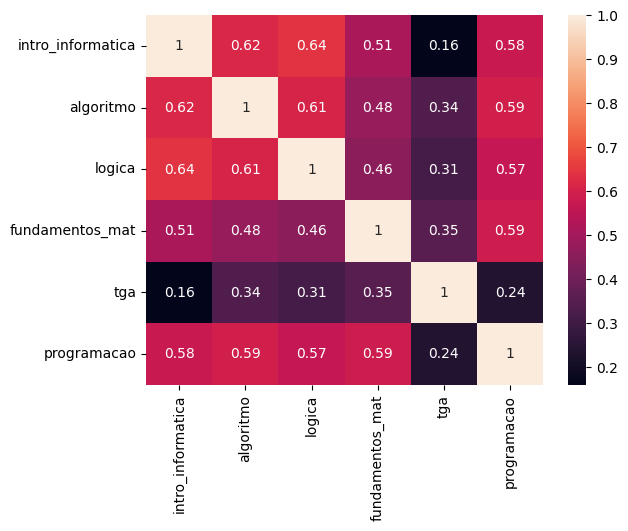

In [728]:
sns.heatmap(corrp, annot = True) # Plotting heatmap

Correlação CÁLCULO DIFERENCIAL E INTEGRAL

In [729]:
corr_calculo = pd.merge( notas_1p, calculo, how = 'inner', on = 'discente')
corr_calculo = corr_calculo.rename(columns={'media_final': 'calculo'})

In [730]:
corr_calculo = corr_calculo.drop(columns=['discente'])

In [731]:
correlacao(corr_calculo)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,calculo
intro_informatica,1.000000,0.600932,0.618255,0.362258,0.040939,0.474921
algoritmo,0.600932,1.000000,0.587610,0.313124,0.342139,0.357536
logica,0.618255,0.587610,1.000000,0.366496,0.252907,0.459381
fundamentos_mat,0.362258,0.313124,0.366496,1.000000,0.163505,0.369023
tga,0.040939,0.342139,0.252907,0.163505,1.000000,0.095903
calculo,0.474921,0.357536,0.459381,0.369023,0.095903,1.000000


In [732]:
corr_tgs = pd.merge( notas_1p, tgs, how = 'inner', on = 'discente')
corr_tgs = corr_tgs.rename(columns={'media_final': 'tgs'})

In [733]:
corr_tgs = corr_tgs.drop(columns=['discente'])

In [734]:
correlacao(corr_tgs)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,tgs
intro_informatica,1.000000,0.629017,0.672749,0.499364,0.175925,0.301664
algoritmo,0.629017,1.000000,0.657940,0.498203,0.411412,0.301650
logica,0.672749,0.657940,1.000000,0.478165,0.354550,0.356972
fundamentos_mat,0.499364,0.498203,0.478165,1.000000,0.314279,0.179280
tga,0.175925,0.411412,0.354550,0.314279,1.000000,0.298619
tgs,0.301664,0.301650,0.356972,0.179280,0.298619,1.000000


Correlação 3° período

In [735]:
notas_2p = pd.merge( notas_1p, calculo, how = 'inner', on = 'discente')
notas_2p = notas_2p.rename(columns={'media_final': 'calculo'})

In [736]:
notas_2p = pd.merge( notas_2p, programacao, how = 'inner', on = 'discente')
notas_2p = notas_2p.rename(columns={'media_final': 'programacao'})

In [737]:
notas_2p = pd.merge( notas_2p, tgs, how = 'inner', on = 'discente')
notas_2p = notas_2p.rename(columns={'media_final': 'tgs'})

Correlação PROGRAMAÇÃO ORIENTADA A OBJETOS I

In [738]:
corr_poo_1 = pd.merge( notas_1p, poo_1, how = 'inner', on = 'discente')
corr_poo_1 = corr_poo_1.rename(columns={'media_final': 'poo_1'})

In [739]:
corr_poo_1 = pd.merge( corr_poo_1, programacao, how = 'inner', on = 'discente')
corr_poo_1 = corr_poo_1.rename(columns={'media_final': 'programacao'})

In [740]:
corr_poo_1 = corr_poo_1.drop(columns=['discente'])

In [741]:
correlacao(corr_poo_1)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,poo_1,programacao
intro_informatica,1.000000,0.590517,0.620320,0.456548,0.118928,0.203838,0.529435
algoritmo,0.590517,1.000000,0.586398,0.409267,0.342103,0.320405,0.625015
logica,0.620320,0.586398,1.000000,0.410730,0.311712,0.134047,0.600676
fundamentos_mat,0.456548,0.409267,0.410730,1.000000,0.313312,0.081554,0.528875
tga,0.118928,0.342103,0.311712,0.313312,1.000000,0.077245,0.290375
poo_1,0.203838,0.320405,0.134047,0.081554,0.077245,1.000000,0.287012
programacao,0.529435,0.625015,0.600676,0.528875,0.290375,0.287012,1.000000


##### Correlação ESTRUTURA DE DADOS

In [742]:
corr_ed = pd.merge(notas_1p, programacao, how = 'inner', on = 'discente')
corr_ed = corr_ed.rename(columns={'media_final': 'programacao'})

corr_ed = pd.merge( corr_ed, ed, how = 'inner', on = 'discente')
corr_ed = corr_ed.rename(columns={'media_final': 'ed'})

corr_ed = corr_ed.drop(columns=['discente'])

correlacao(corr_ed)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,programacao,ed
intro_informatica,1.000000,0.577332,0.585056,0.465001,0.093771,0.532053,0.409363
algoritmo,0.577332,1.000000,0.577970,0.411594,0.357767,0.619195,0.388559
logica,0.585056,0.577970,1.000000,0.408137,0.310936,0.619960,0.345419
fundamentos_mat,0.465001,0.411594,0.408137,1.000000,0.292186,0.526783,0.208994
tga,0.093771,0.357767,0.310936,0.292186,1.000000,0.317198,0.174330
programacao,0.532053,0.619195,0.619960,0.526783,0.317198,1.000000,0.429215
ed,0.409363,0.388559,0.345419,0.208994,0.174330,0.429215,1.000000


##### Correlação FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO

In [743]:
corr_fundamentos_si = pd.merge(notas_1p, tgs, how = 'inner', on = 'discente')
corr_fundamentos_si = corr_fundamentos_si.rename(columns={'media_final': 'tgs'})

corr_fundamentos_si = pd.merge(corr_fundamentos_si, fundamentos_si, how = 'inner', on = 'discente')
corr_fundamentos_si = corr_fundamentos_si.rename(columns={'media_final': 'fundamentos_si'})
corr_fundamentos_si = corr_fundamentos_si.drop(columns=['discente'])
correlacao(corr_fundamentos_si)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,tgs,fundamentos_si
intro_informatica,1.000000,0.643216,0.659284,0.520495,0.090673,0.270275,0.249362
algoritmo,0.643216,1.000000,0.619822,0.486239,0.387409,0.403274,0.380526
logica,0.659284,0.619822,1.000000,0.465851,0.312184,0.457774,0.345256
fundamentos_mat,0.520495,0.486239,0.465851,1.000000,0.316484,0.166770,0.131325
tga,0.090673,0.387409,0.312184,0.316484,1.000000,0.385224,0.357889
tgs,0.270275,0.403274,0.457774,0.166770,0.385224,1.000000,0.485836
fundamentos_si,0.249362,0.380526,0.345256,0.131325,0.357889,0.485836,1.000000


##### Correlação ÁLGEBRA LINEAR

In [744]:
corr_algebra = pd.merge( notas_1p, algebra, how = 'inner', on = 'discente')
corr_algebra = corr_algebra.rename(columns={'media_final': 'algebra'})
corr_algebra = corr_algebra.drop(columns=['discente'])
correlacao(corr_algebra)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,algebra
intro_informatica,1.000000,0.588274,0.605822,0.428483,0.050302,0.408626
algoritmo,0.588274,1.000000,0.541032,0.398359,0.322992,0.286345
logica,0.605822,0.541032,1.000000,0.381748,0.217138,0.346141
fundamentos_mat,0.428483,0.398359,0.381748,1.000000,0.269990,0.271102
tga,0.050302,0.322992,0.217138,0.269990,1.000000,0.016728
algebra,0.408626,0.286345,0.346141,0.271102,0.016728,1.000000


##### Correlação 	ORGANIZAÇÃO, SISTEMAS E MÉTODOS

In [745]:
corr_osm = pd.merge( notas_1p, osm, how = 'inner', on = 'discente')
corr_osm = corr_osm.rename(columns={'media_final': 'osm'})
corr_osm = corr_osm.drop(columns=['discente'])
correlacao(corr_osm)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo,logica,fundamentos_mat,tga,osm
intro_informatica,1.000000,0.590716,0.607331,0.490974,0.129586,0.434792
algoritmo,0.590716,1.000000,0.614339,0.470825,0.343496,0.384105
logica,0.607331,0.614339,1.000000,0.471788,0.309826,0.395599
fundamentos_mat,0.490974,0.470825,0.471788,1.000000,0.323562,0.315765
tga,0.129586,0.343496,0.309826,0.323562,1.000000,0.273688
osm,0.434792,0.384105,0.395599,0.315765,0.273688,1.000000


## Correlação - Programação

#### Programação -> Algoritmo e Lógica de Programação

In [746]:
pro_cor = pd.merge(algoritmo, programacao, how = 'inner', on = 'discente')
pro_cor = pro_cor.rename(columns={'media_final_x': 'algoritmo', 'media_final_y': 'programacao'})
pro_cor = pro_cor.drop(columns=['discente'])
pro_cor

,algoritmo,programacao
0,5.90,4.00
1,6.00,7.10
2,6.80,4.15
3,2.95,0.80
4,5.30,5.20
...,...,...
392,8.00,7.00
393,9.10,9.70
394,9.70,8.60
395,8.70,10.00


In [747]:
correlacao(pro_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,algoritmo,programacao
algoritmo,1.000000,0.562569
programacao,0.562569,1.000000


## Programação -> Fundamentos de Matemática

In [748]:
pro_corr_fud_si = pd.merge(fundamentos_mat, programacao, how = 'inner', on = 'discente')
pro_corr_fud_si  = pro_corr_fud_si.rename(columns={'media_final_x': 'fundamentos_mat', 'media_final_y': 'programacao'})
pro_corr_fud_si  = pro_corr_fud_si.drop(columns=['discente'])
correlacao(pro_corr_fud_si )

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,fundamentos_mat,programacao
fundamentos_mat,1.000000,0.561963
programacao,0.561963,1.000000


#### Programação -> Cálculo Diferencial e Integral

In [749]:
pro_corr_calculo = pd.merge(logica, programacao, how = 'inner', on = 'discente')
pro_corr_calculo = pro_corr_calculo.rename(columns={'media_final_x': 'logica', 'media_final_y': 'programacao'})
pro_corr_calculo = pro_corr_calculo.drop(columns=['discente'])
correlacao(pro_corr_calculo)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,logica,programacao
logica,1.000000,0.549630
programacao,0.549630,1.000000


## Correlação Introdução à Informática

#### Introdução à Informática -> Algoritmo e Lógica de Programação

In [750]:
intro_corr_algoritmo = pd.merge(algoritmo, intro_informatica, how = 'inner', on = 'discente')
intro_corr_algoritmo = intro_corr_algoritmo.rename(columns={'media_final_x': 'algoritmo', 'media_final_y': 'intro_informatica', 'nota_x':'algoritmo_n1', 'nota_y':'intro_informatica_n1'})
intro_corr_algoritmo = intro_corr_algoritmo.drop(columns=['discente'])
correlacao(intro_corr_algoritmo)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,algoritmo,intro_informatica
algoritmo,1.000000,0.794427
intro_informatica,0.794427,1.000000


#### Introdução à Informática -> Fundamentos de Matemática

In [751]:
intro_cor = pd.merge(fundamentos_mat, intro_informatica, how = 'inner', on = 'discente')
intro_cor = intro_cor.rename(columns={'media_final_x': 'fundamentos_mat', 'media_final_y': 'intro_informatica'})
intro_cor = intro_cor.drop(columns=['discente'])
correlacao(intro_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,fundamentos_mat,intro_informatica
fundamentos_mat,1.000000,0.690513
intro_informatica,0.690513,1.000000


#### Introdução à Informática -> Lógica

In [752]:
intro_cor = pd.merge(logica, intro_informatica, how = 'inner', on = 'discente')
intro_cor = intro_cor.rename(columns={'media_final_x': 'logica', 'media_final_y': 'intro_informatica'})
intro_cor = intro_cor.drop(columns=['discente'])
correlacao(intro_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,logica,intro_informatica
logica,1.000000,0.801520
intro_informatica,0.801520,1.000000


#### Introdução à Informática -> Programação

In [753]:
intro_cor = pd.merge(programacao, intro_informatica, how = 'inner', on = 'discente')
intro_cor = intro_cor.rename(columns={'media_final_x': 'programacao', 'media_final_y': 'intro_informatica'})
intro_cor = intro_cor.drop(columns=['discente'])
correlacao(intro_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,programacao,intro_informatica
programacao,1.000000,0.570141
intro_informatica,0.570141,1.000000


#### Introdução à Informática -> Teoria Geral da Administração

In [754]:
intro_cor = pd.merge(tga, intro_informatica, how = 'inner', on = 'discente')
intro_cor = intro_cor.rename(columns={'media_final_x': 'tga', 'media_final_y': 'intro_informatica'})
intro_cor = intro_cor.drop(columns=['discente'])
correlacao(intro_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,tga,intro_informatica
tga,1.000000,0.589379
intro_informatica,0.589379,1.000000


## Correlação Fundamentos de Matemática

#### Fundamentos de Matemática -> Algoritmo e Lógica de Programação

In [755]:
fun_cor = pd.merge(algoritmo, fundamentos_mat, how = 'inner', on = 'discente')
fun_cor = fun_cor.rename(columns={'media_final_x': 'algoritmo', 'media_final_y': 'fundamentos_mat', 'nota_x':'algoritmo_n1', 'nota_y':'fundamentos_mat_n1'})
fun_cor = fun_cor.drop(columns=['discente'])
correlacao(fun_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,algoritmo,fundamentos_mat
algoritmo,1.000000,0.709215
fundamentos_mat,0.709215,1.000000


#### Fundamentos de Matemática -> Lógica

In [756]:
fun_cor = pd.merge(logica, fundamentos_mat, how = 'inner', on = 'discente')
fun_cor = fun_cor.rename(columns={'media_final_x': 'logica', 'media_final_y': 'fundamentos_mat'})
fun_cor = fun_cor.drop(columns=['discente'])
correlacao(fun_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,logica,fundamentos_mat
logica,1.000000,0.676551
fundamentos_mat,0.676551,1.000000


#### Fundamentos de Matemática -> Teoria Geral da Administração

In [757]:
fun_cor = pd.merge(tga, fundamentos_mat, how = 'inner', on = 'discente')
fun_cor = fun_cor.rename(columns={'media_final_x': 'tga', 'media_final_y': 'fundamentos_mat'})
fun_cor = fun_cor.drop(columns=['discente'])
correlacao(fun_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,tga,fundamentos_mat
tga,1.000000,0.611728
fundamentos_mat,0.611728,1.000000


#### Fundamentos de Matemática -> Introdução à Informática

In [758]:
fun_cor = pd.merge(intro_informatica, fundamentos_mat, how = 'inner', on = 'discente')
fun_cor = fun_cor.rename(columns={'media_final_x': 'intro_informatica', 'media_final_y': 'fundamentos_mat'})
fun_cor = fun_cor.drop(columns=['discente'])
correlacao(fun_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,fundamentos_mat
intro_informatica,1.000000,0.690513
fundamentos_mat,0.690513,1.000000


## Correlação Lógica

#### Lógica -> Algoritmo e Lógica de Programação

In [759]:
log_cor = pd.merge(algoritmo, logica, how = 'inner', on = 'discente')
log_cor = log_cor.rename(columns={'media_final_x': 'algoritmo', 'media_final_y': 'logica', 'nota_x':'algoritmo_n1', 'nota_y':'logica_n1'})
log_cor = log_cor.drop(columns=['discente'])
correlacao(log_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,algoritmo,logica
algoritmo,1.000000,0.826162
logica,0.826162,1.000000


#### Lógica -> Fundamentos de Matemática

In [760]:
log_cor = pd.merge(fundamentos_mat, logica, how = 'inner', on = 'discente')
log_cor = log_cor.rename(columns={'media_final_x': 'fundamentos_mat', 'media_final_y': 'logica'})
log_cor = log_cor.drop(columns=['discente'])
correlacao(log_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,fundamentos_mat,logica
fundamentos_mat,1.000000,0.676551
logica,0.676551,1.000000


#### Lógica -> Teoria Geral da Administração

In [761]:
log_cor = pd.merge(tga, logica, how = 'inner', on = 'discente')
log_cor = log_cor.rename(columns={'media_final_x': 'tga', 'media_final_y': 'logica'})
log_cor = log_cor.drop(columns=['discente'])
correlacao(log_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,tga,logica
tga,1.000000,0.672345
logica,0.672345,1.000000


#### Lógica -> Introdução à Informática

In [762]:
log_cor = pd.merge(intro_informatica, logica, how = 'inner', on = 'discente')
log_cor = log_cor.rename(columns={'media_final_x': 'intro_informatica', 'media_final_y': 'logica'})
log_cor = log_cor.drop(columns=['discente'])
correlacao(log_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,logica
intro_informatica,1.000000,0.801520
logica,0.801520,1.000000


## Correlação Estrutura de Dados

#### Estrutura de Dados -> Programação Orientada à Objetos I

In [763]:
ed_cor = pd.merge(poo_1, ed, how = 'inner', on = 'discente')
ed_cor = ed_cor.rename(columns={'media_final_x': 'poo_1', 'media_final_y': 'ed'})
ed_cor = ed_cor.drop(columns=['discente'])
correlacao(ed_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,poo_1,ed
poo_1,1.000000,0.635872
ed,0.635872,1.000000


#### Estrutura de Dados -> Álgebra Linear

In [764]:
ed_cor = pd.merge(algebra, ed, how = 'inner', on = 'discente')
ed_cor = ed_cor.rename(columns={'media_final_x': 'algebra', 'media_final_y': 'ed'})
ed_cor = ed_cor.drop(columns=['discente'])
correlacao(ed_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,algebra,ed
algebra,1.000000,0.488632
ed,0.488632,1.000000


#### Estrutura de Dados -> Organização, Sistemas e Métodos

In [765]:
ed_cor = pd.merge(osm, ed, how = 'inner', on = 'discente')
ed_cor = ed_cor.rename(columns={'media_final_x': 'osm', 'media_final_y': 'ed'})
ed_cor = ed_cor.drop(columns=['discente'])
correlacao(ed_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,osm,ed
osm,1.000000,0.554990
ed,0.554990,1.000000


#### Estrutura de Dados -> Banco de Dados

In [766]:
ed_cor = pd.merge(bd_1, ed, how = 'inner', on = 'discente')
ed_cor = ed_cor.rename(columns={'media_final_x': 'bd_1', 'media_final_y': 'ed'})
ed_cor = ed_cor.drop(columns=['discente'])
correlacao(ed_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,bd_1,ed
bd_1,1.000000,0.510769
ed,0.510769,1.000000


## Correlação Arquitetura de Computadores

#### Arquitetura de Computadores -> Programação Orientada à Objetos I

In [767]:
arqt_cor = pd.merge(poo_1, arquitetura, how = 'inner', on = 'discente')
arqt_cor = arqt_cor.rename(columns={'media_final_x': 'poo_1', 'media_final_y': 'arquitetura'})
arqt_cor = arqt_cor.drop(columns=['discente'])
correlacao(arqt_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,poo_1,arquitetura
poo_1,1.000000,0.604187
arquitetura,0.604187,1.000000


#### Arquitetura de Computadores -> Estrutura de Dados

In [768]:
arqt_cor = pd.merge(ed, arquitetura, how = 'inner', on = 'discente')
arqt_cor = arqt_cor.rename(columns={'media_final_x': 'ed', 'media_final_y': 'arquitetura'})
arqt_cor = arqt_cor.drop(columns=['discente'])
correlacao(arqt_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,ed,arquitetura
ed,1.000000,0.617393
arquitetura,0.617393,1.000000


#### Arquitetura de Computadores -> Banco de Dados

In [769]:
arqt_cor = pd.merge(bd_1, arquitetura, how = 'inner', on = 'discente')
arqt_cor = arqt_cor.rename(columns={'media_final_x': 'bd_1', 'media_final_y': 'arquitetura'})
arqt_cor = arqt_cor.drop(columns=['discente'])
correlacao(arqt_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,bd_1,arquitetura
bd_1,1.000000,0.579615
arquitetura,0.579615,1.000000


## Correlação Algoritmo e Lógica de Programação

#### Algoritmo e Lógica de Programação -> Fundamentos de Matemática

In [770]:
alp_cor = pd.merge(fundamentos_mat, algoritmo, how = 'inner', on = 'discente')
alp_cor = alp_cor.rename(columns={'media_final_x': 'fundamentos_mat', 'media_final_y': 'algoritmo'})
alp_cor = alp_cor.drop(columns=['discente'])
correlacao(alp_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,fundamentos_mat,algoritmo
fundamentos_mat,1.000000,0.709215
algoritmo,0.709215,1.000000


#### Algoritmo e Lógica de Programação -> Teoria Geral da Administração

In [771]:
alp_cor = pd.merge(tga, algoritmo, how = 'inner', on = 'discente')
alp_cor = alp_cor.rename(columns={'media_final_x': 'tga', 'media_final_y': 'algoritmo'})
alp_cor = alp_cor.drop(columns=['discente'])
correlacao(alp_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,tga,algoritmo
tga,1.000000,0.709225
algoritmo,0.709225,1.000000


#### Algoritmo e Lógica de Programação -> Introdução à Informática

In [772]:
alp_cor = pd.merge(intro_informatica, algoritmo, how = 'inner', on = 'discente')
alp_cor = alp_cor.rename(columns={'media_final_x': 'intro_informatica', 'media_final_y': 'algoritmo'})
alp_cor = alp_cor.drop(columns=['discente'])
correlacao(alp_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,intro_informatica,algoritmo
intro_informatica,1.000000,0.794427
algoritmo,0.794427,1.000000


#### Algoritmo e Lógica de Programação -> Lógica

In [773]:
alp_cor = pd.merge(logica, algoritmo, how = 'inner', on = 'discente')
alp_cor = alp_cor.rename(columns={'media_final_x': 'logica', 'media_final_y': 'algoritmo'})
alp_cor = alp_cor.drop(columns=['discente'])
correlacao(alp_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,logica,algoritmo
logica,1.000000,0.826162
algoritmo,0.826162,1.000000


## Correlação Programação Orientada à Objetos I

#### Programação Orientada à Objetos I -> Estrutura de Dados

In [774]:
pro_oo1_cor = pd.merge(ed, poo_1, how = 'inner', on = 'discente')
pro_oo1_cor = pro_oo1_cor.rename(columns={'media_final_x': 'ed', 'media_final_y': 'poo_1'})
pro_oo1_cor = pro_oo1_cor.drop(columns=['discente'])
correlacao(pro_oo1_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,ed,poo_1
ed,1.000000,0.635872
poo_1,0.635872,1.000000


#### Programação Orientada à Objetos I -> Organização, Sistemas e Métodos

In [775]:
pro_oo1_cor = pd.merge(osm, poo_1, how = 'inner', on = 'discente')
pro_oo1_cor = pro_oo1_cor.rename(columns={'media_final_x': 'osm', 'media_final_y': 'poo_1'})
pro_oo1_cor = pro_oo1_cor.drop(columns=['discente'])
correlacao(pro_oo1_cor)

/tmp/ipykernel_6400/373976776.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = corr_df.style.applymap(lambda x: 'background-color: %s' % 'blue' if x > 0.7 else '')


,osm,poo_1
osm,1.000000,0.535896
poo_1,0.535896,1.000000
